<a href="https://colab.research.google.com/github/afrin-sultana23/machine_learning/blob/main/ml_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("/content/drive/MyDrive/csv/PhiUSIIL_Phishing_URL_Dataset.csv")

In [4]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [6]:
display(df['Crypto'].value_counts())

,count
Crypto,
0,230260
1,5535


In [7]:
print(f"Number of null values in 'LetterRatioInURL': {df['LetterRatioInURL'].isnull().sum()}")

Number of null values in 'LetterRatioInURL': 0


In [8]:
print(f"Number of null values in 'IsDomainIP': {df['IsDomainIP'].isnull().sum()}")

Number of null values in 'IsDomainIP': 0


In [9]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [10]:
df.dropna(inplace=True)
print("Rows with null values have been dropped. Now we have a processed dataset.")

Rows with null values have been dropped. Now we have a processed dataset.


In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'TLD' column
df['TLD_encoded'] = label_encoder.fit_transform(df['TLD'])

# Display the first few rows with the new encoded column
display(df.head())

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,1,34,20,28,119,0,124,1,231
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,1,50,9,8,39,0,217,1,254
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,1,10,2,7,42,2,5,1,647
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,3,27,15,22,1,31,1,231
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,0,1,244,15,34,72,1,85,1,503


In [12]:
tld_counts = df['TLD'].value_counts()
print(tld_counts)

TLD
com           112554
org            18793
net             7097
app             6508
uk              6395
               ...  
15                 1
nr                 1
parts              1
kitchen            1
associates         1
Name: count, Length: 695, dtype: int64


In [13]:
# Define the list of top TLDs to keep
top_tlds = ['com', 'org', 'net', 'app', 'uk']

# Filter the DataFrame to keep only rows where the 'tld' is in the top_tlds list
df = df[df['TLD'].isin(top_tlds)]

# Display the first few rows of the filtered DataFrame
display(df.head())

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,1,34,20,28,119,0,124,1,231
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,1,10,2,7,42,2,5,1,647
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,3,27,15,22,1,31,1,231
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,0,1,244,15,34,72,1,85,1,503
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,1,35,1,11,86,0,14,1,503


In [14]:
df['TLD_encoded'] = label_encoder.fit_transform(df['TLD'])


display(df.head())

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,1,34,20,28,119,0,124,1,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,1,10,2,7,42,2,5,1,4
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,3,27,15,22,1,31,1,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,0,1,244,15,34,72,1,85,1,3
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,1,35,1,11,86,0,14,1,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151347 entries, 0 to 235794
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    151347 non-null  object 
 1   URL                         151347 non-null  object 
 2   URLLength                   151347 non-null  int64  
 3   Domain                      151347 non-null  object 
 4   DomainLength                151347 non-null  int64  
 5   IsDomainIP                  151347 non-null  int64  
 6   TLD                         151347 non-null  object 
 7   URLSimilarityIndex          151347 non-null  float64
 8   CharContinuationRate        151347 non-null  float64
 9   TLDLegitimateProb           151347 non-null  float64
 10  URLCharProb                 151347 non-null  float64
 11  TLDLength                   151347 non-null  int64  
 12  NoOfSubDomain               151347 non-null  int64  
 13  HasObfuscation     

In [16]:
df['label'].unique()

array([1, 0])

In [17]:
label_counts = df['label'].value_counts()
print(label_counts)

label
1    95520
0    55827
Name: count, dtype: int64


In [18]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
count,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,...,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000
mean,32.997053,21.537057,0.000198,83.216985,0.884007,0.401878,0.058109,2.957746,1.066668,0.001196,...,0.027790,0.540678,28.276220,6.960112,11.648490,68.878663,2.539072,53.535458,0.631132,1.378997
std,38.289274,7.518565,0.014078,25.531405,0.192820,0.206732,0.009068,0.201169,0.478506,0.034562,...,0.164372,0.498344,84.999162,92.904573,23.640814,189.254658,20.012458,183.246240,0.482500,0.907321
min,14.000000,7.000000,0.000000,0.304877,0.000000,0.001502,0.006335,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,17.000000,0.000000,66.720000,0.800000,0.079963,0.054141,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,28.000000,20.000000,0.000000,100.000000,1.000000,0.522907,0.059698,3.000000,1.000000,0.000000,...,0.000000,1.000000,12.000000,3.000000,7.000000,27.000000,0.000000,14.000000,1.000000,1.000000
75%,33.000000,25.000000,0.000000,100.000000,1.000000,0.522907,0.064060,3.000000,1.000000,0.000000,...,0.000000,1.000000,32.000000,8.000000,17.000000,93.000000,1.000000,66.000000,1.000000,1.000000
max,4274.000000,105.000000,1.000000,100.000000,1.000000,0.522907,0.090824,3.000000,10.000000,1.000000,...,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000,4.000000


In [19]:
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
235788,632917.txt,https://www.karibpan.com,23,www.karibpan.com,16,0,com,100.0,1.000000,0.522907,...,0,1,21,3,22,31,0,8,1,1
235789,179093.txt,https://www.life-in-ecuador.com,30,www.life-in-ecuador.com,23,0,com,100.0,0.533333,0.522907,...,0,1,43,1,16,42,0,44,1,1
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.0,1.000000,0.522907,...,0,1,51,7,21,187,2,191,1,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.0,0.785714,0.028555,...,0,0,50,1,7,88,0,31,1,4
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.0,1.000000,0.522907,...,0,1,21,6,18,256,0,261,1,1


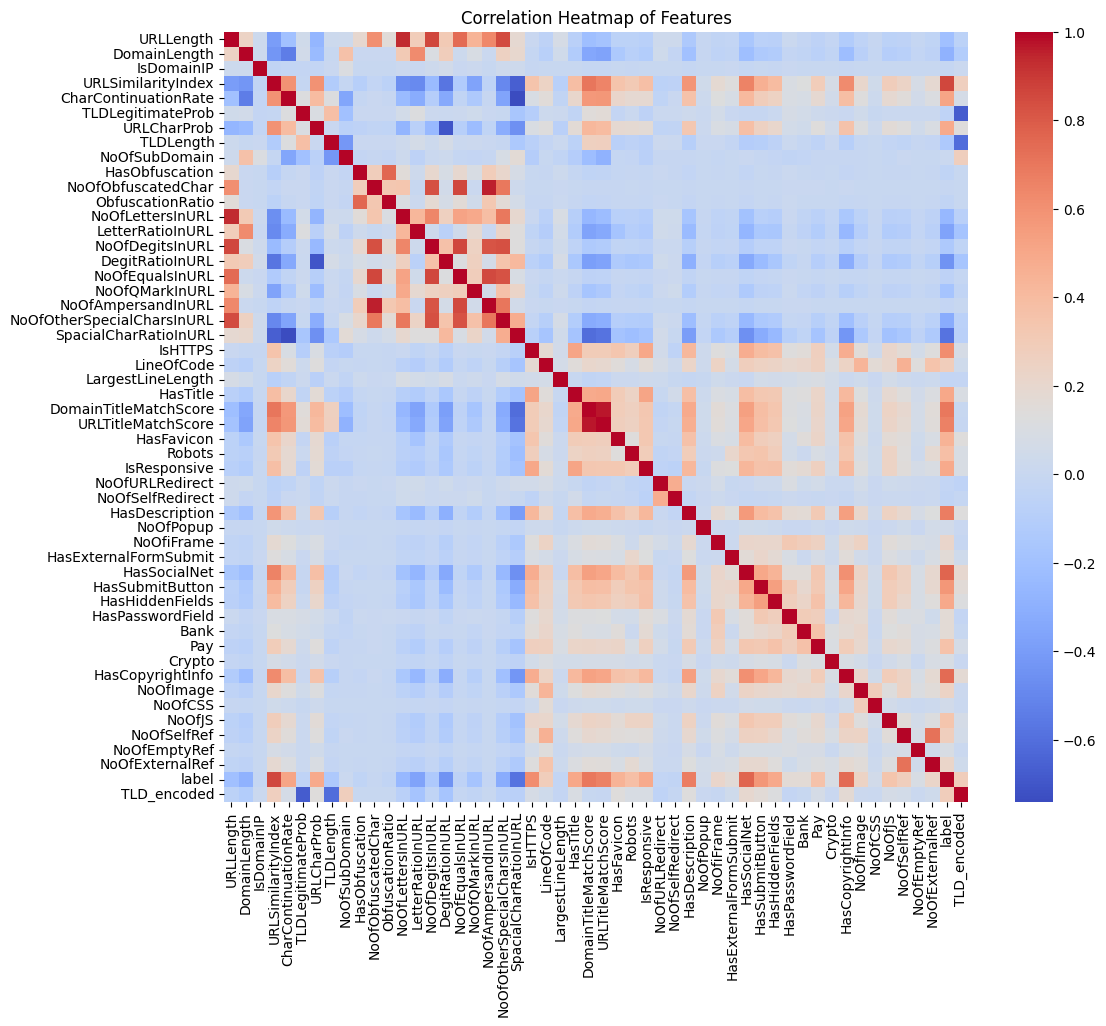

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [21]:
# Calculate absolute correlations with the 'label' column
abs_correlations = correlation_matrix['label'].abs().sort_values(ascending=False)

# Select the top 12 highly correlated columns (excluding 'label' itself)
top_25_features = abs_correlations[1:26].index.tolist()

# Include 'label' in the list of columns to keep
columns_to_keep = top_25_features + ['label']

print("Columns to keep:", columns_to_keep)

Columns to keep: ['URLSimilarityIndex', 'HasSocialNet', 'HasCopyrightInfo', 'DomainTitleMatchScore', 'HasDescription', 'URLTitleMatchScore', 'IsHTTPS', 'SpacialCharRatioInURL', 'HasSubmitButton', 'CharContinuationRate', 'HasTitle', 'HasHiddenFields', 'IsResponsive', 'URLCharProb', 'HasFavicon', 'DegitRatioInURL', 'Robots', 'LetterRatioInURL', 'Pay', 'NoOfJS', 'NoOfOtherSpecialCharsInURL', 'DomainLength', 'TLD_encoded', 'LineOfCode', 'NoOfSelfRef', 'label']


In [22]:
# Drop the other columns from the DataFrame
df = df[columns_to_keep]

print("DataFrame updated with the top 25 features most correlated with 'label'.")
display(df.head())

DataFrame updated with the top 25 features most correlated with 'label'.


,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
0,100.0,0,1,0.000000,0,0.000000,1,0.032,1,1.000000,...,1,0.581,0,28,1,24,1,558,119,1
2,100.0,0,1,46.666667,1,46.666667,1,0.069,1,0.866667,...,1,0.517,0,7,2,22,4,467,42,1
3,100.0,1,1,0.000000,0,0.000000,1,0.038,1,1.000000,...,1,0.500,1,15,1,19,1,6356,22,1
4,100.0,1,1,100.000000,1,100.000000,1,0.030,1,1.000000,...,1,0.606,1,34,1,26,3,6089,72,1
5,100.0,1,1,0.000000,1,0.000000,1,0.033,0,1.000000,...,0,0.567,0,11,1,23,3,1210,86,1


In [23]:
print(df['label'].value_counts())

label
1    95520
0    55827
Name: count, dtype: int64


In [24]:
df.describe()

,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
count,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,...,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000
mean,83.216985,0.506036,0.540678,61.118042,0.488619,62.660133,0.818926,0.056941,0.446028,0.884007,...,0.288100,0.525108,0.276847,11.648490,2.021025,21.537057,1.378997,1237.605040,68.878663,0.631132
std,25.531405,0.499965,0.498344,48.491941,0.499872,48.093357,0.385081,0.030311,0.497080,0.192820,...,0.452879,0.109038,0.447442,23.640814,3.547905,7.518565,0.907321,3158.469953,189.254658,0.482500
min,0.304877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.056000,0.000000,0.000000,0.000000,7.000000,0.000000,2.000000,0.000000,0.000000
25%,66.720000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.037000,0.000000,0.800000,...,0.000000,0.458000,0.000000,0.000000,1.000000,17.000000,1.000000,49.000000,0.000000,0.000000
50%,100.000000,1.000000,1.000000,100.000000,0.000000,100.000000,1.000000,0.043000,0.000000,1.000000,...,0.000000,0.520000,0.000000,7.000000,1.000000,20.000000,1.000000,539.000000,27.000000,1.000000
75%,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.071000,1.000000,1.000000,...,1.000000,0.594000,1.000000,17.000000,2.000000,25.000000,1.000000,1387.000000,93.000000,1.000000
max,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.286000,1.000000,1.000000,...,1.000000,0.926000,1.000000,6957.000000,499.000000,105.000000,4.000000,422798.000000,27397.000000,1.000000


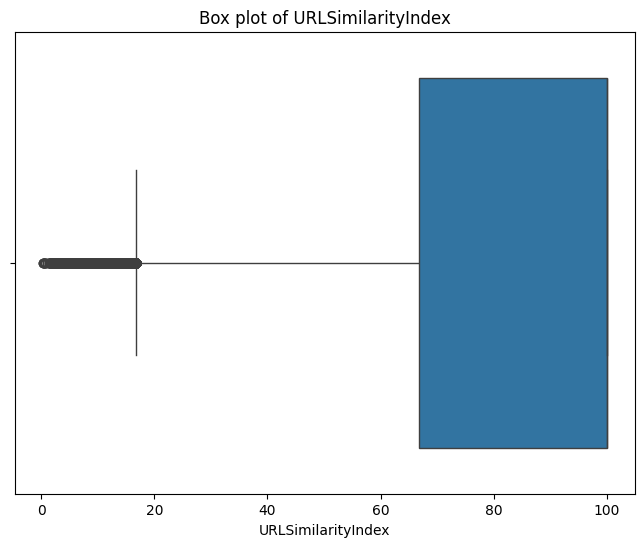

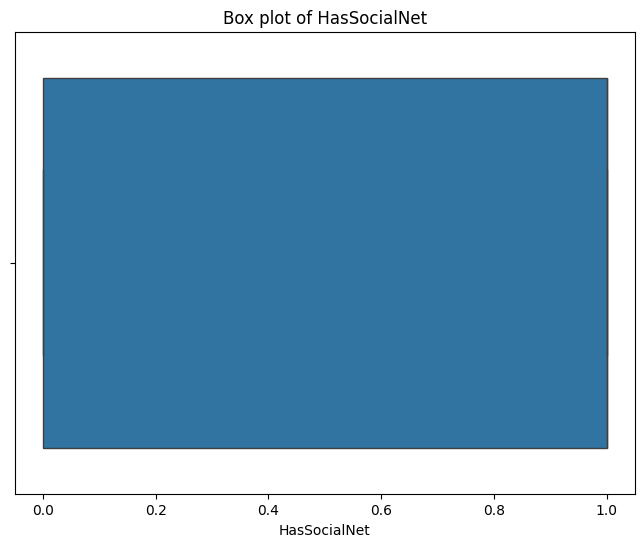

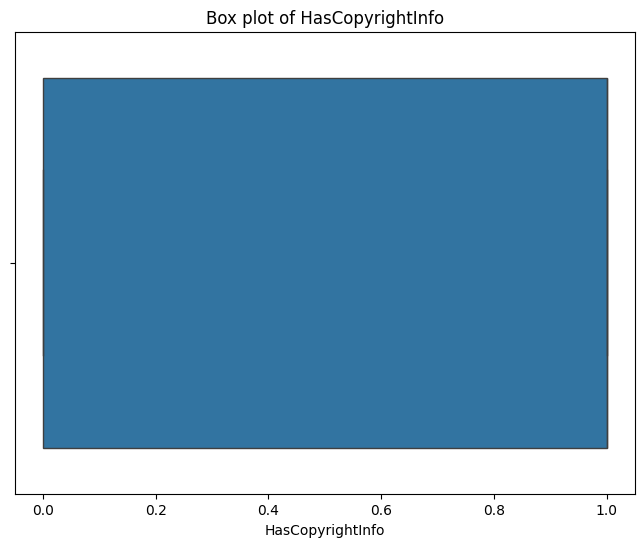

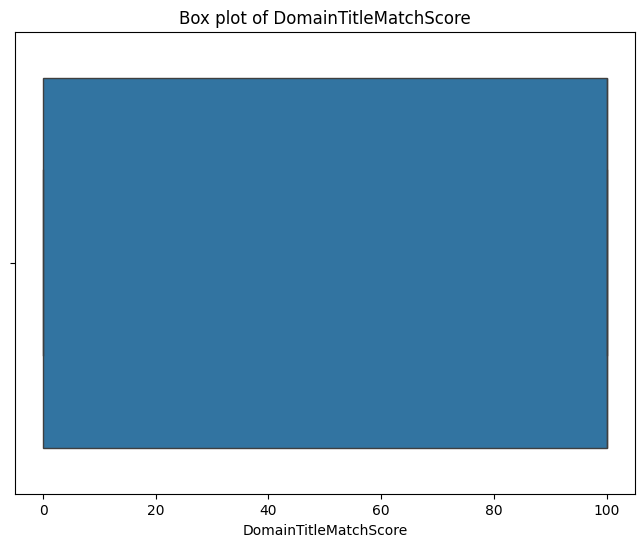

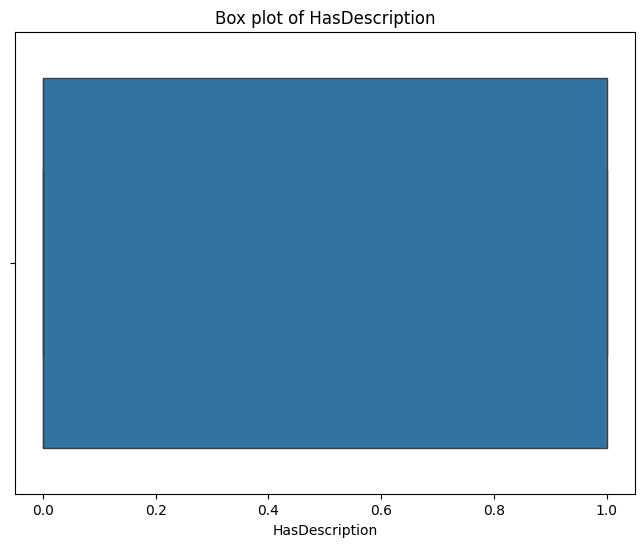

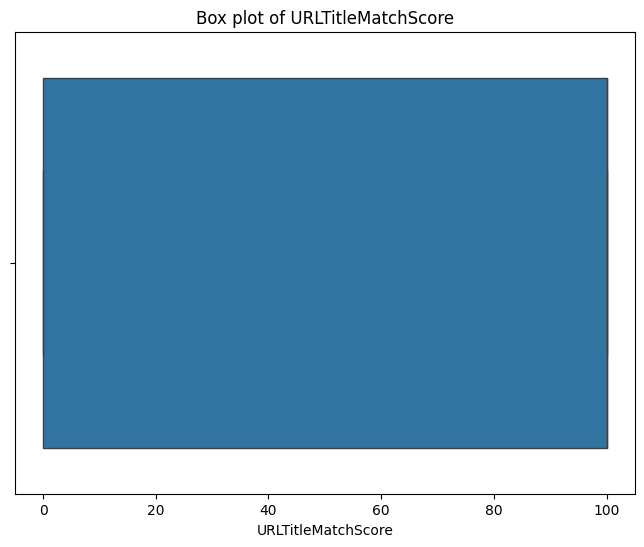

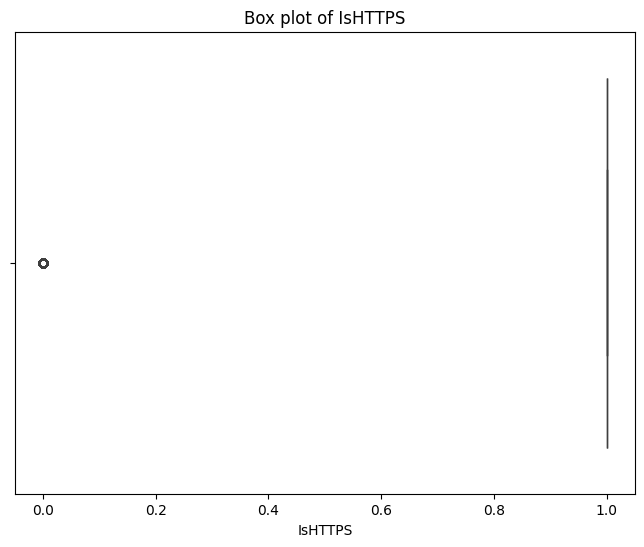

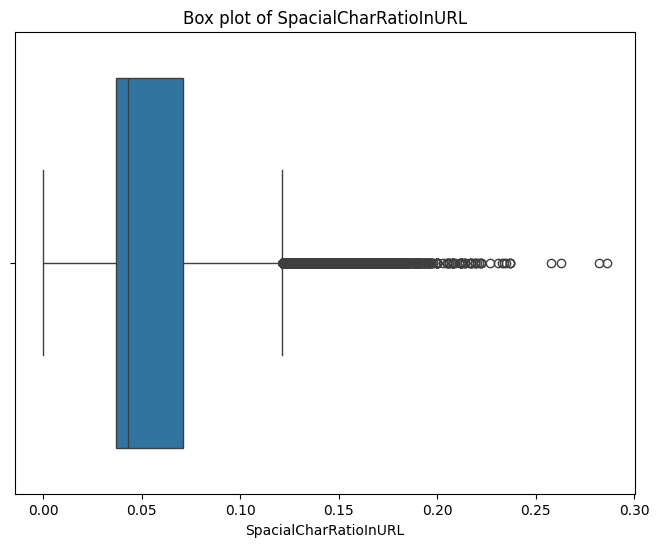

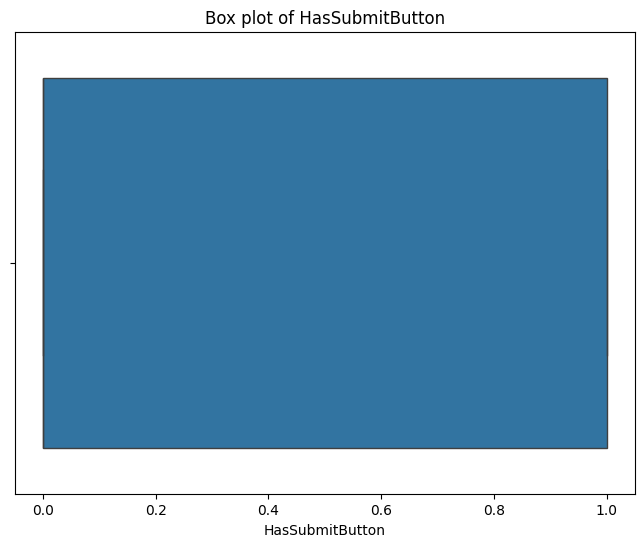

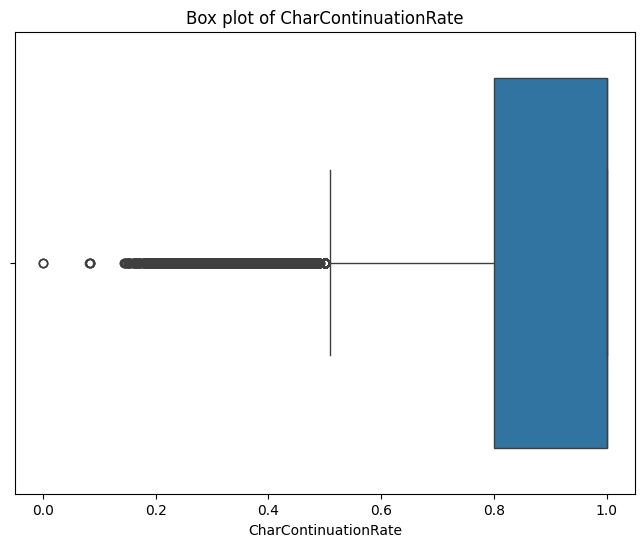

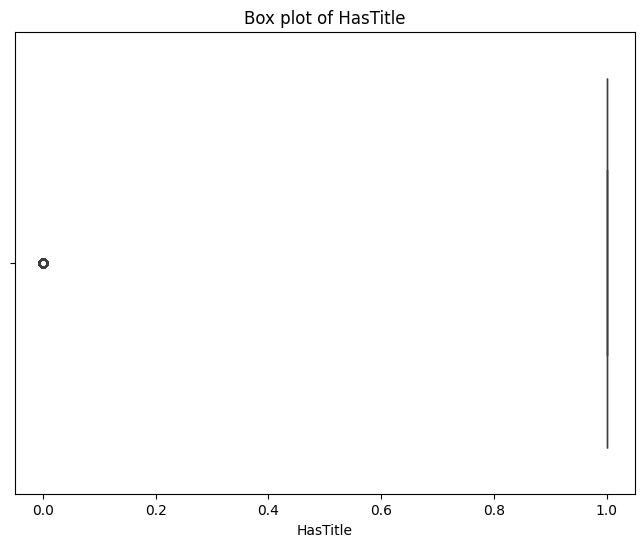

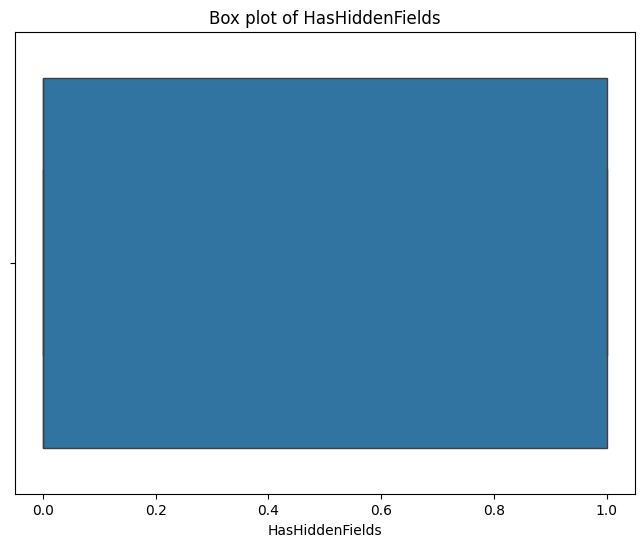

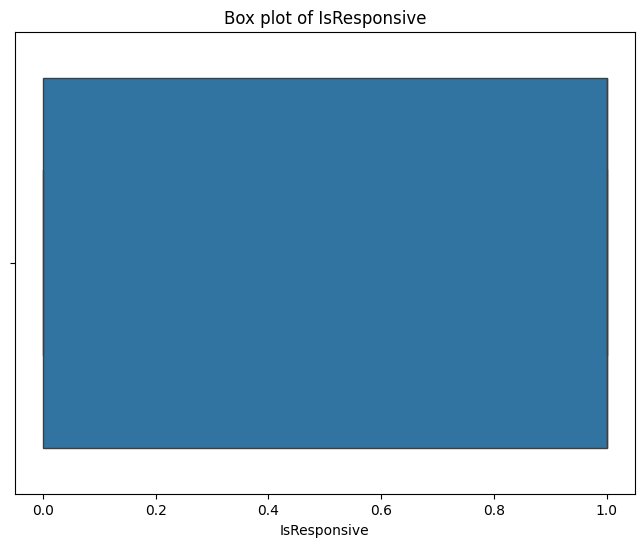

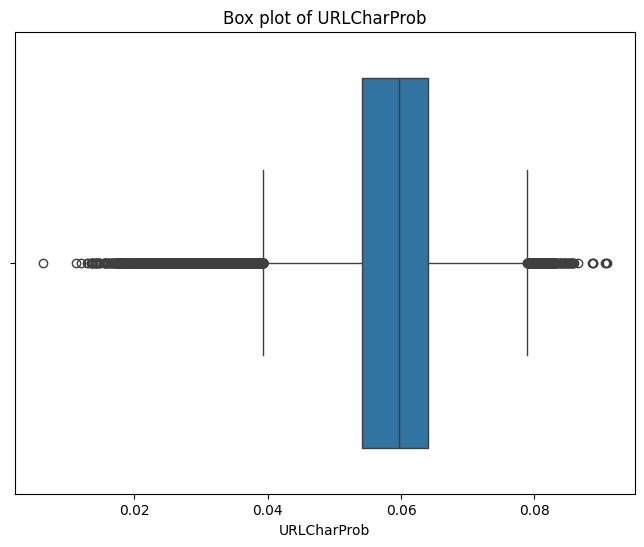

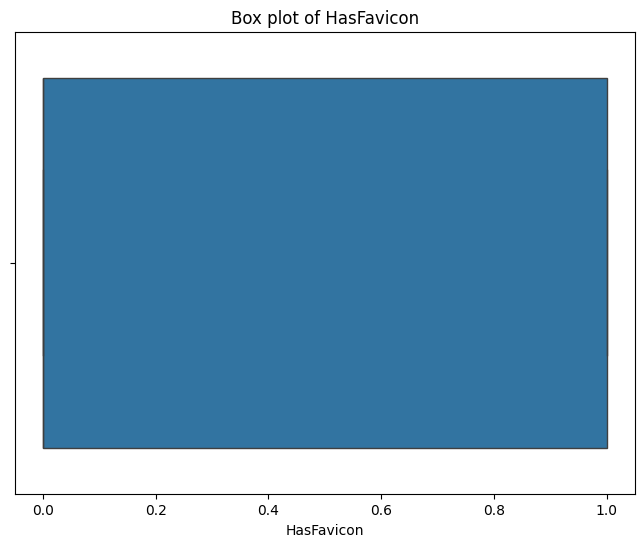

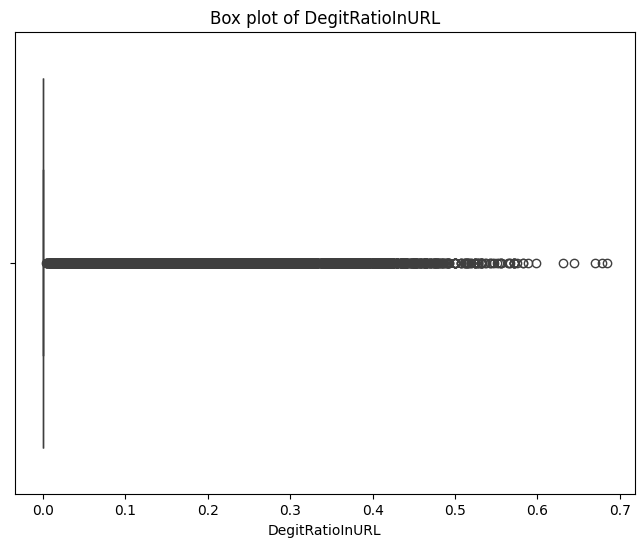

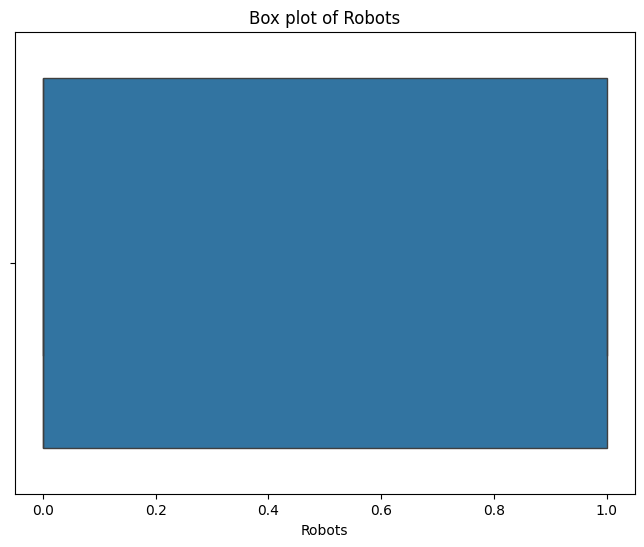

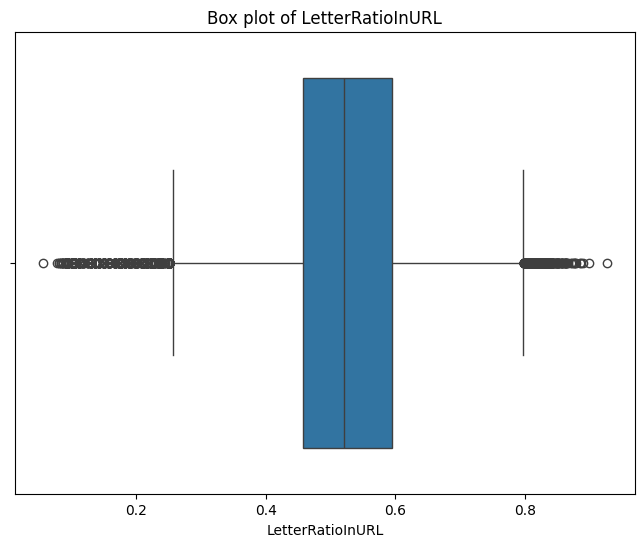

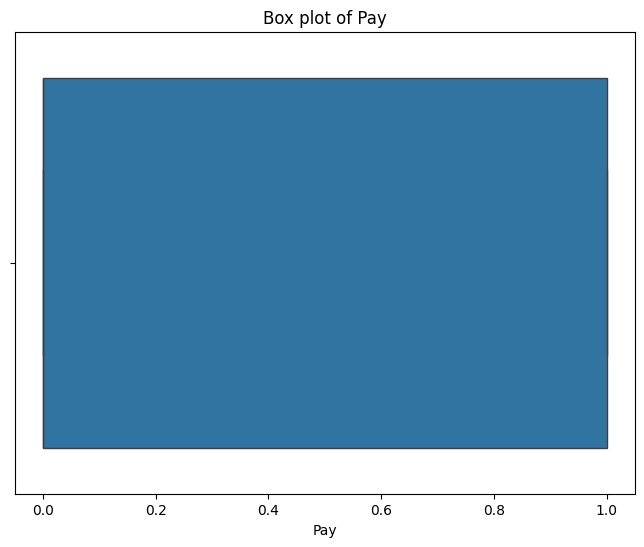

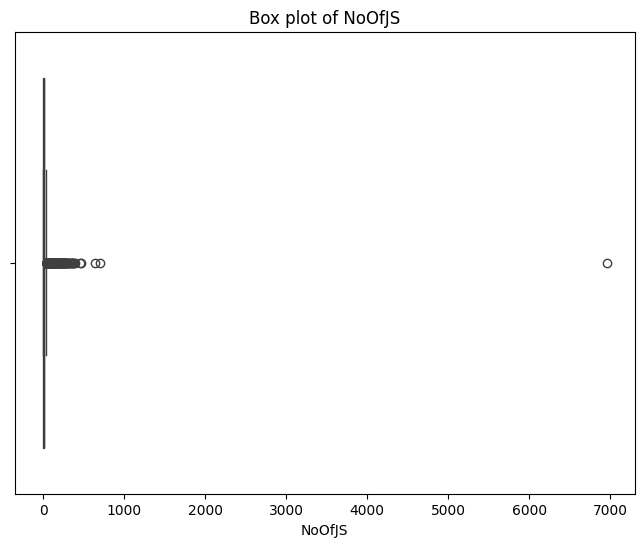

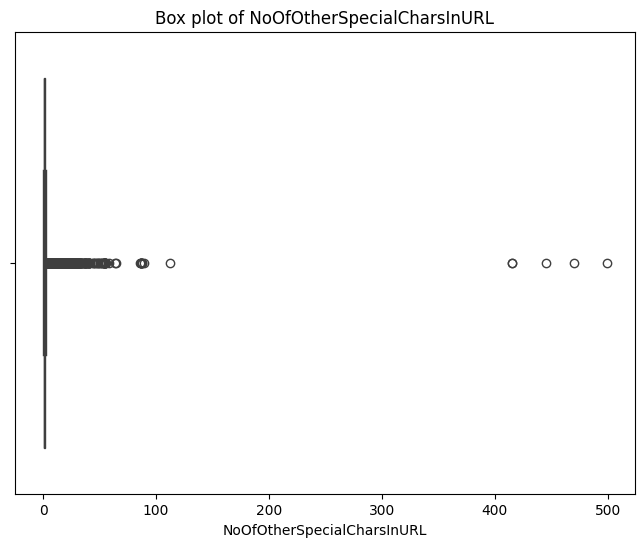

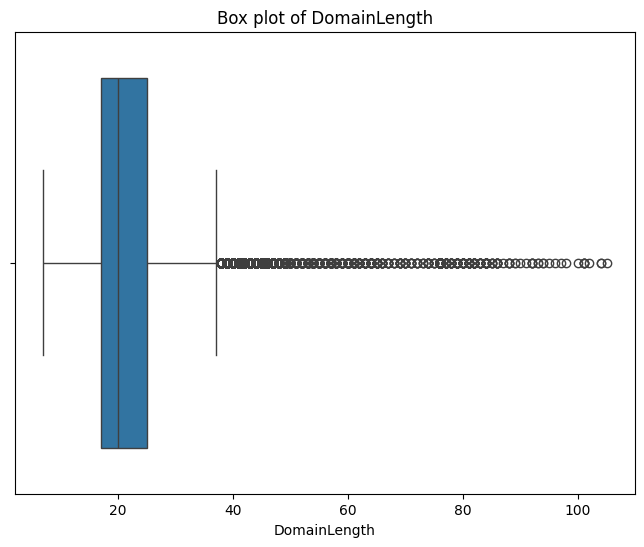

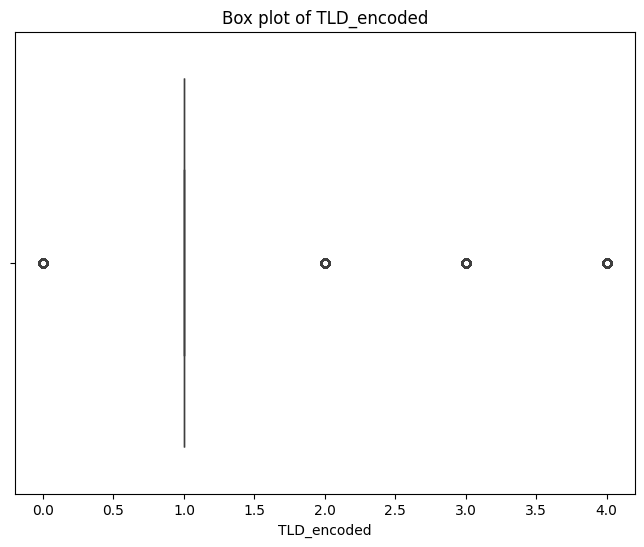

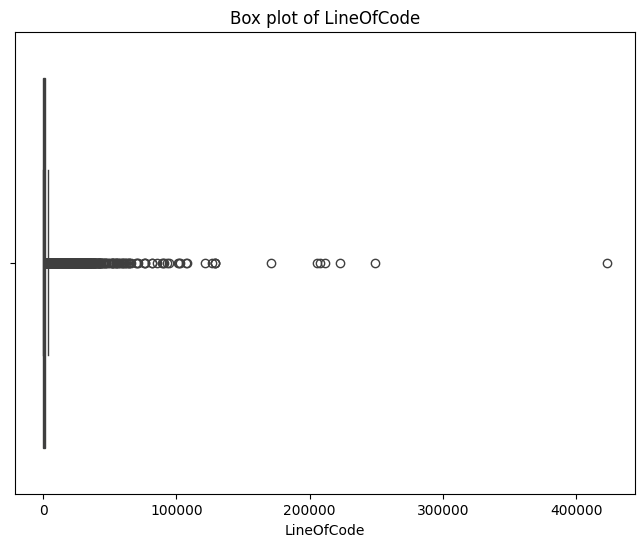

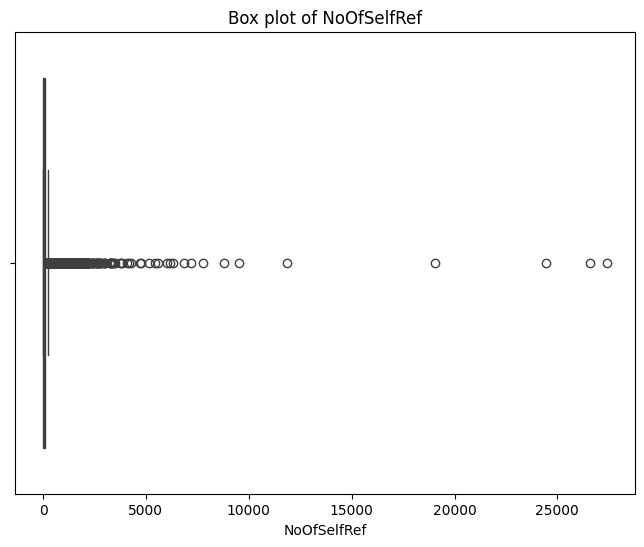

In [25]:
for column in df.columns:
    if column != 'label':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        plt.show()

In [26]:
# Identify columns for outlier removal based on previous box plots (excluding 'label')
columns_to_clean = [column for column in df.columns if column != 'label']

# Remove outliers using the IQR method for each identified column
for column in columns_to_clean:
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Outliers removed from the DataFrame based on IQR for the selected columns.")
display(df.head())

Outliers removed from the DataFrame based on IQR for the selected columns.


,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
0,100.0,0,1,0.000000,0,0.000000,1,0.032,1,1.000000,...,1,0.581,0,28,1,24,1,558,119,1
2,100.0,0,1,46.666667,1,46.666667,1,0.069,1,0.866667,...,1,0.517,0,7,2,22,4,467,42,1
3,100.0,1,1,0.000000,0,0.000000,1,0.038,1,1.000000,...,1,0.500,1,15,1,19,1,6356,22,1
4,100.0,1,1,100.000000,1,100.000000,1,0.030,1,1.000000,...,1,0.606,1,34,1,26,3,6089,72,1
5,100.0,1,1,0.000000,1,0.000000,1,0.033,0,1.000000,...,0,0.567,0,11,1,23,3,1210,86,1


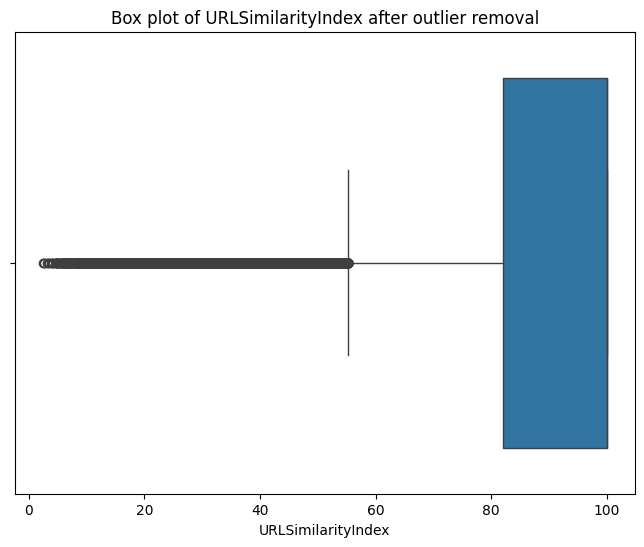

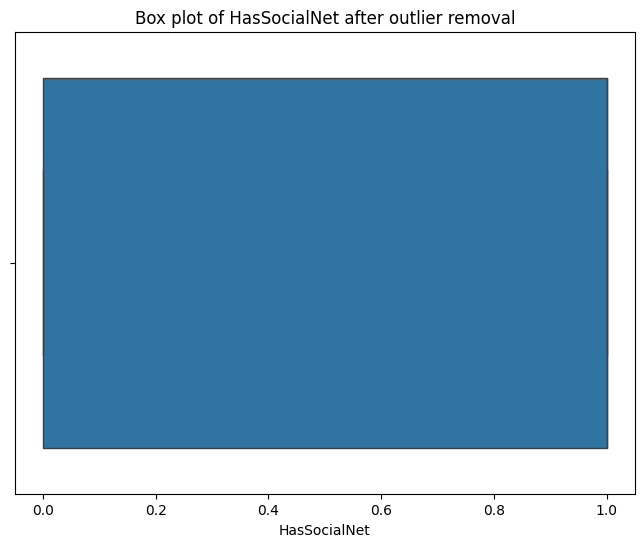

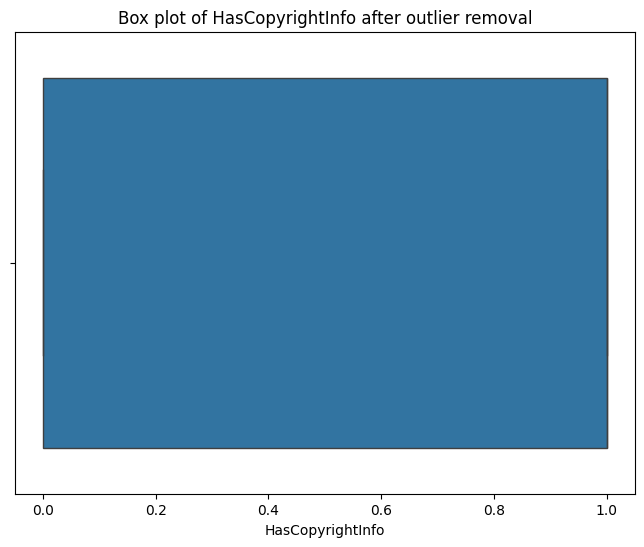

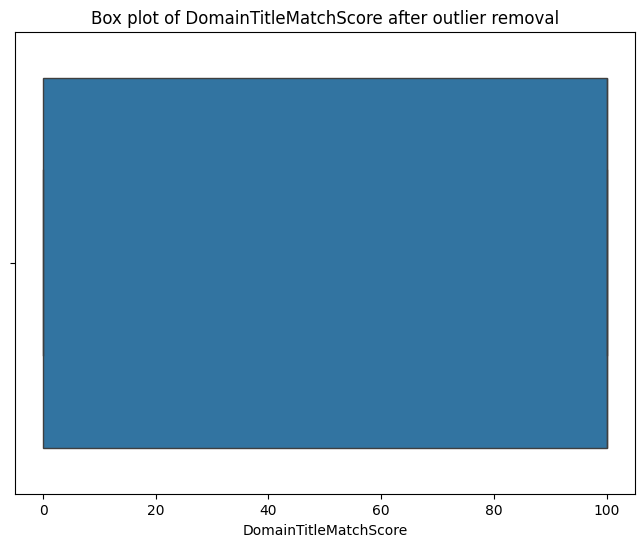

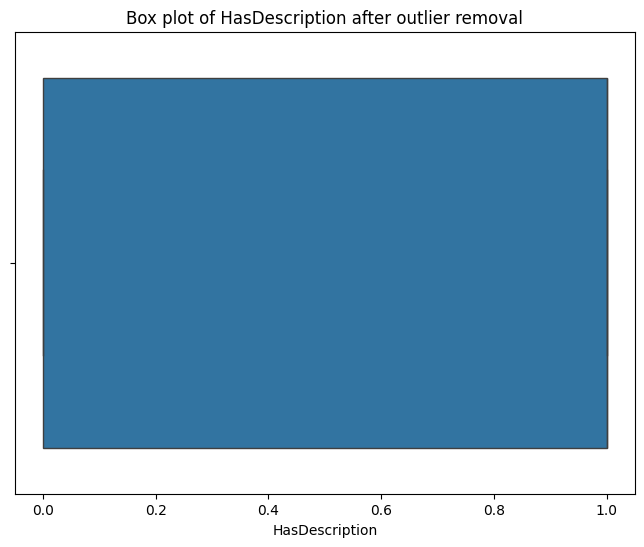

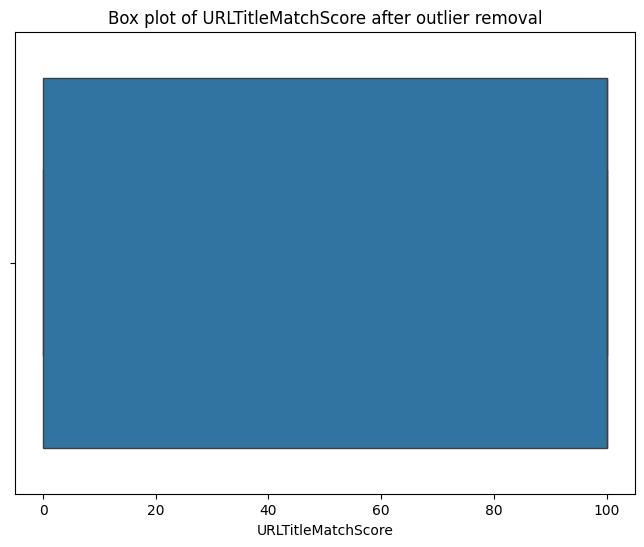

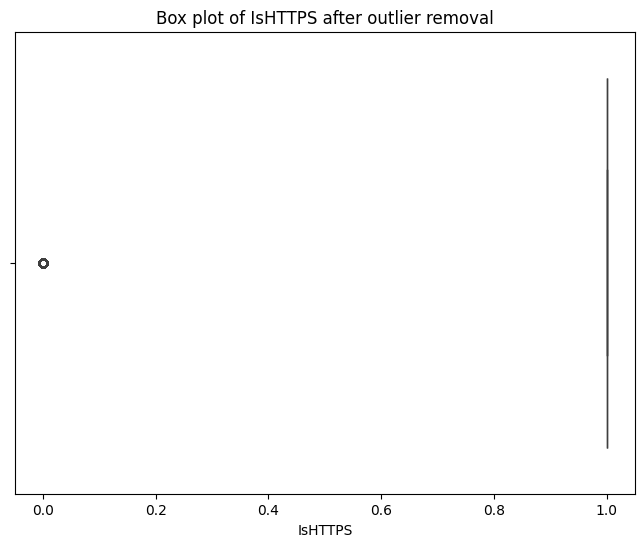

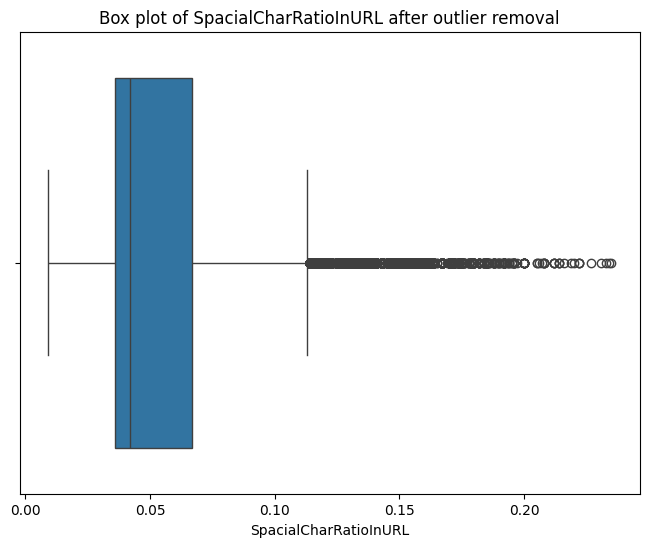

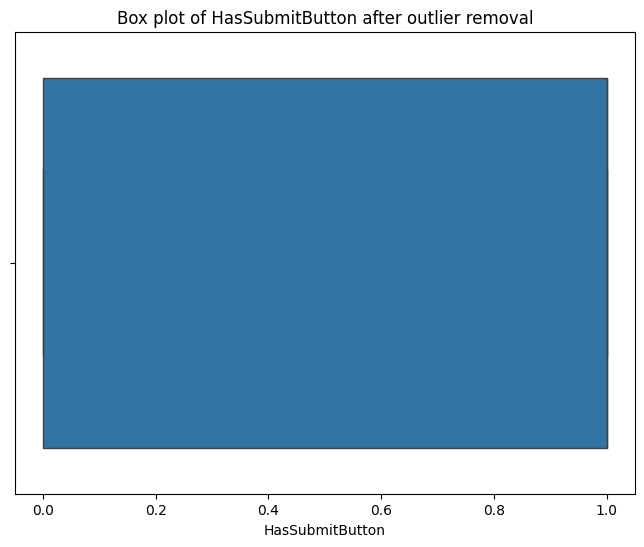

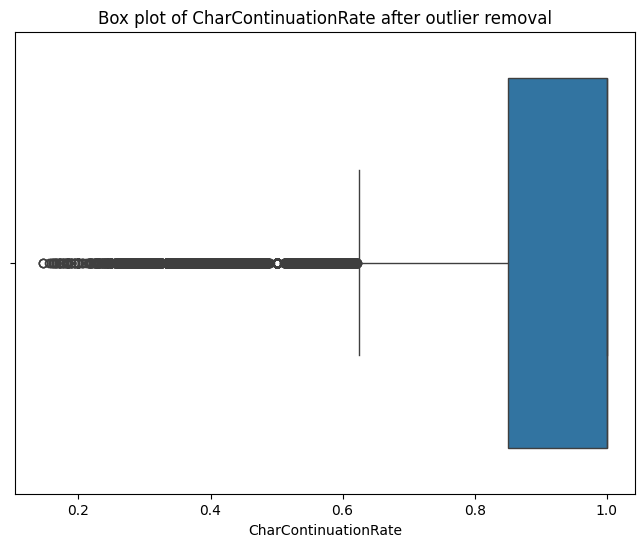

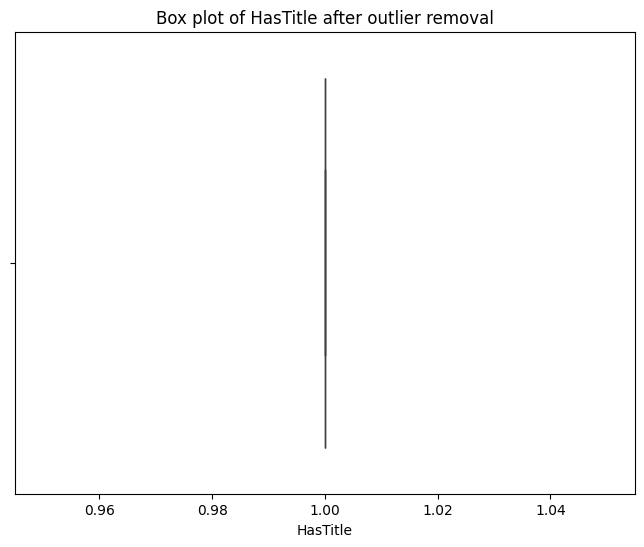

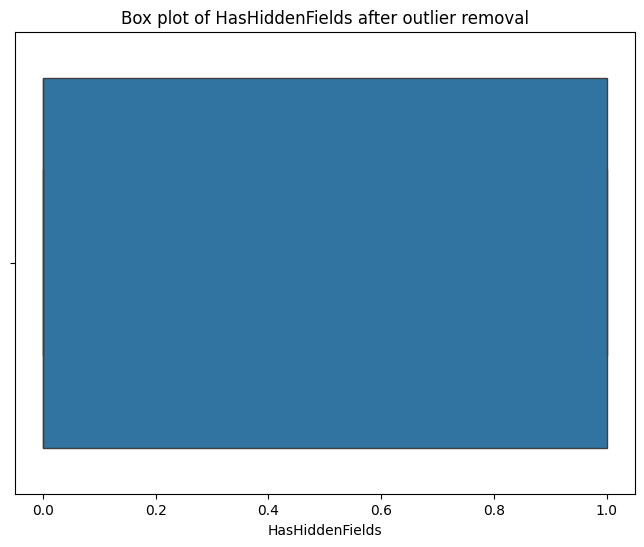

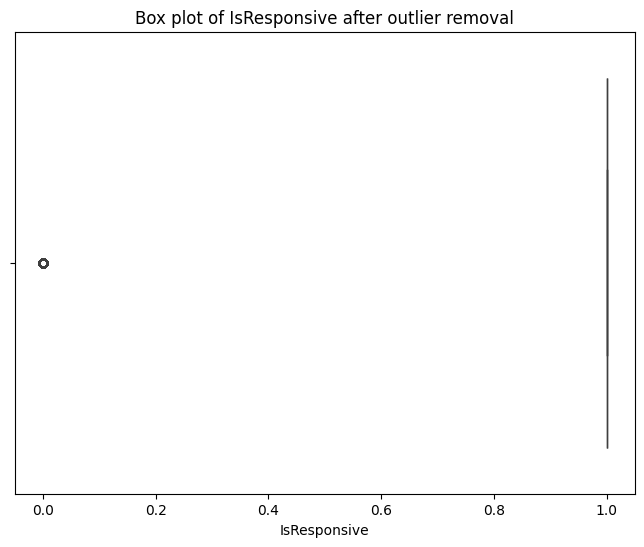

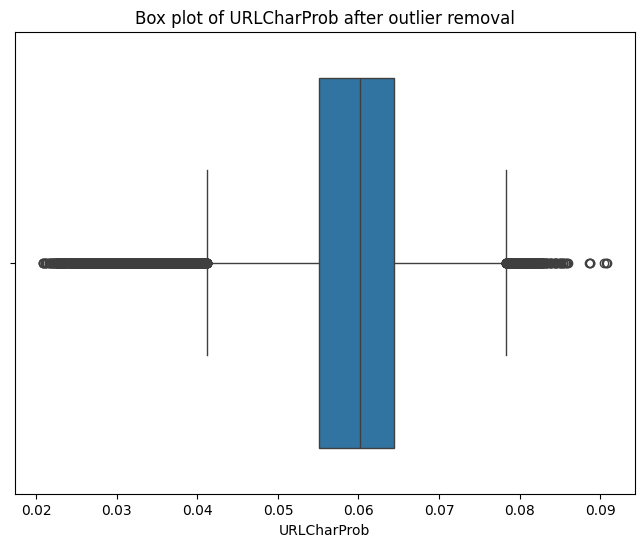

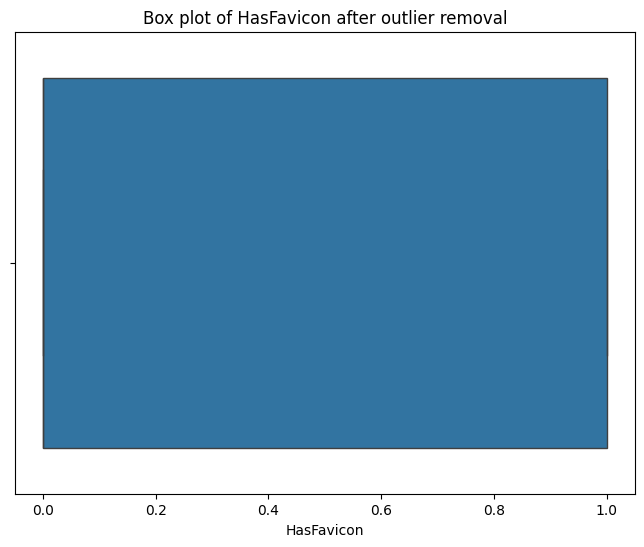

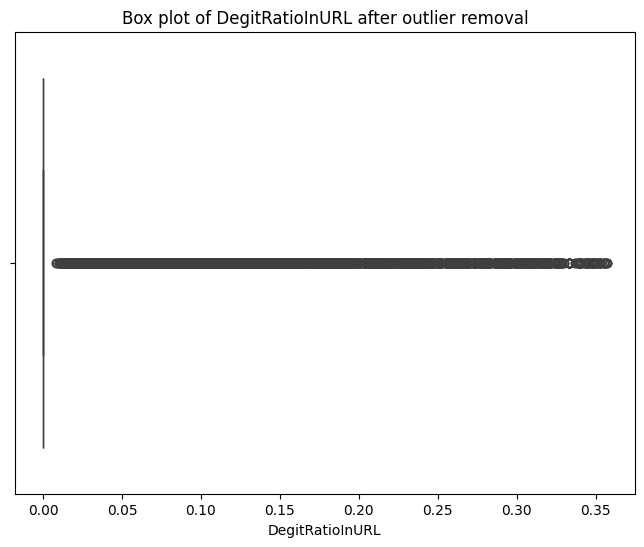

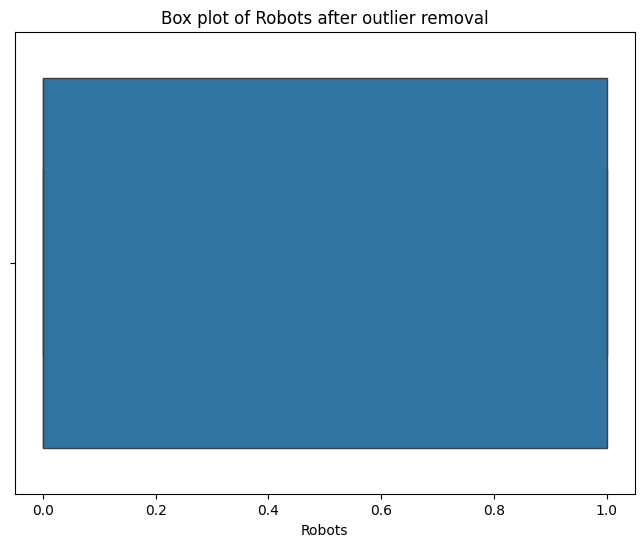

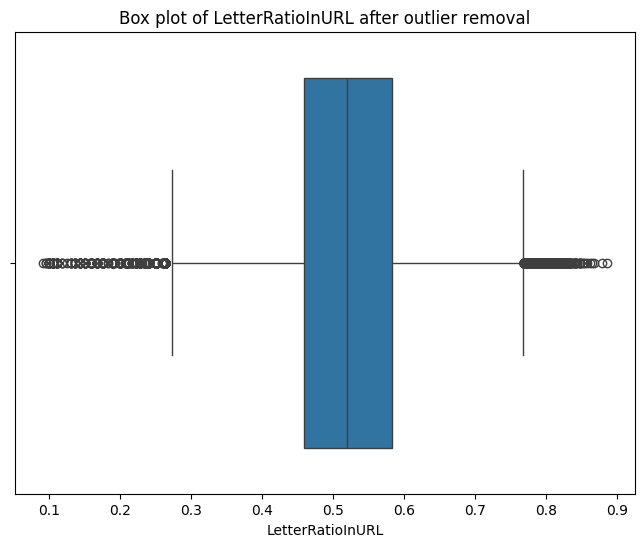

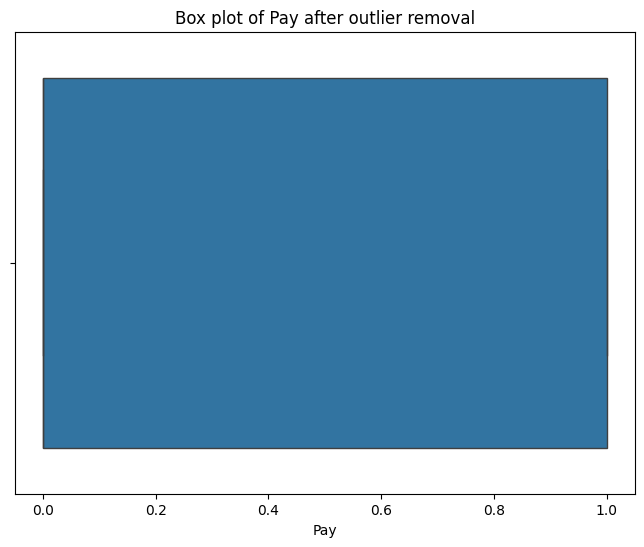

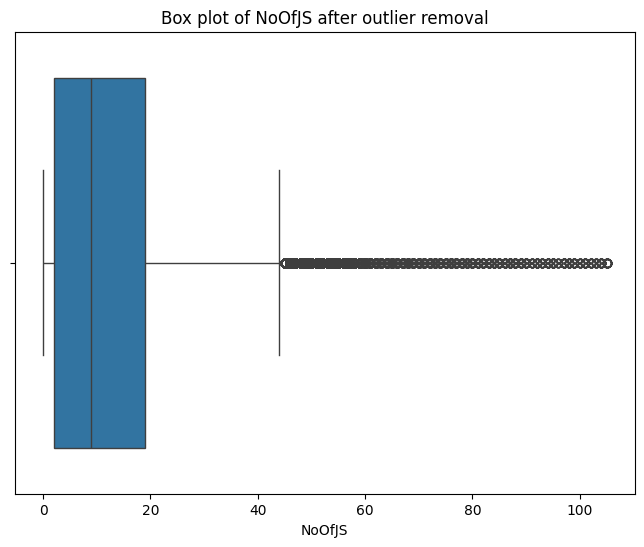

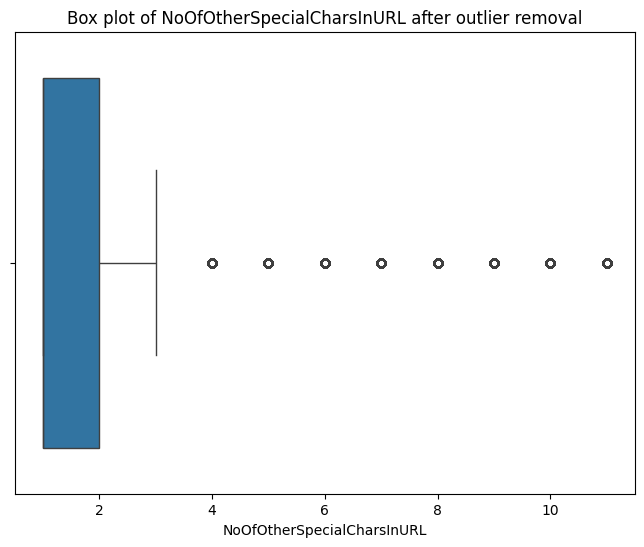

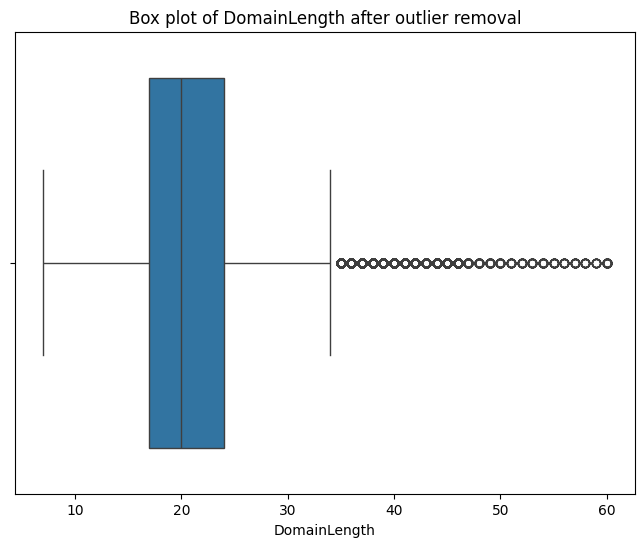

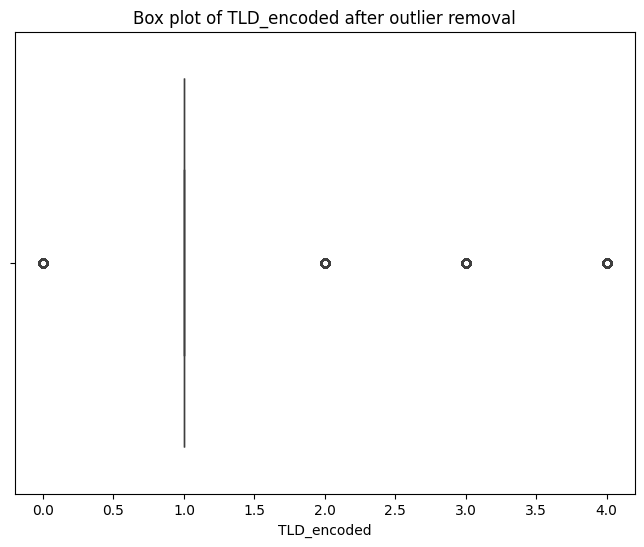

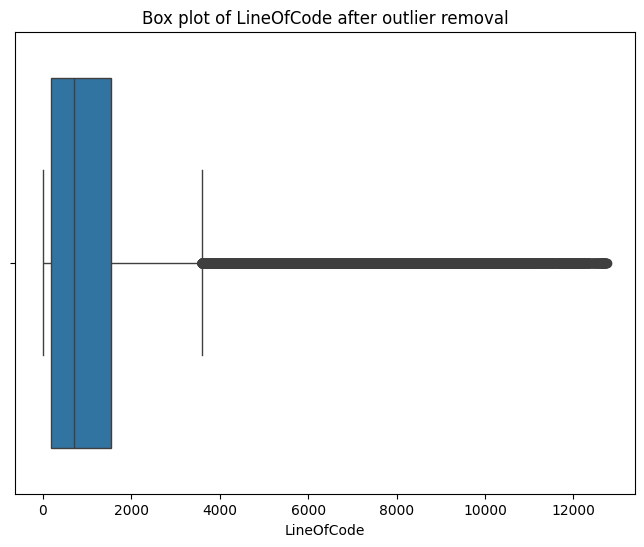

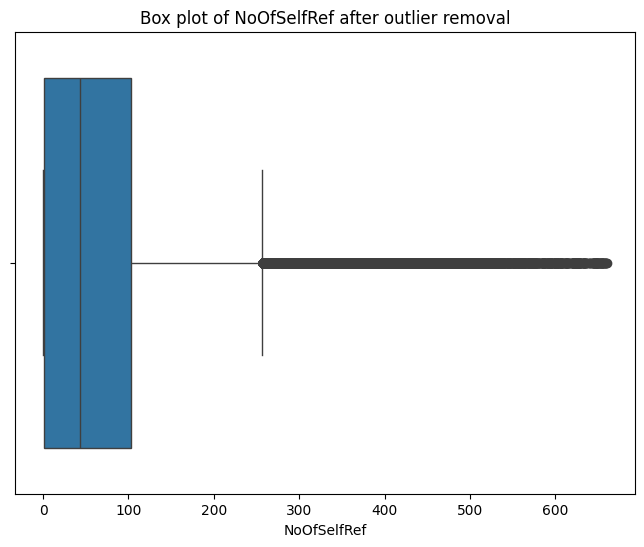

In [27]:
for column in df.columns:
    if column != 'label':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column} after outlier removal')
        plt.show()

In [28]:
df.describe()

,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
count,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,...,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000,127995.000000
mean,87.831170,0.584109,0.620571,70.883966,0.564889,72.604133,0.895957,0.054379,0.506809,0.901709,...,0.332325,0.519161,0.311770,12.964311,1.713700,21.047111,1.418087,1243.298855,71.255822,0.730716
std,22.481037,0.492877,0.485247,45.187767,0.495773,44.333222,0.305318,0.028481,0.499956,0.176960,...,0.471049,0.104121,0.463218,14.076622,1.447752,6.178856,0.939703,1682.317023,92.026822,0.443590
min,2.443999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009000,0.000000,0.146341,...,0.000000,0.091000,0.000000,0.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000
25%,82.093664,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.036000,0.000000,0.850000,...,0.000000,0.458000,0.000000,2.000000,1.000000,17.000000,1.000000,175.000000,1.000000,0.000000
50%,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.042000,1.000000,1.000000,...,0.000000,0.519000,0.000000,9.000000,1.000000,20.000000,1.000000,706.000000,43.000000,1.000000
75%,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.067000,1.000000,1.000000,...,1.000000,0.582000,1.000000,19.000000,2.000000,24.000000,1.000000,1543.000000,103.000000,1.000000
max,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.235000,1.000000,1.000000,...,1.000000,0.885000,1.000000,105.000000,11.000000,60.000000,4.000000,12753.000000,660.000000,1.000000


In [29]:
print(df['label'].value_counts())

label
1    93528
0    34467
Name: count, dtype: int64


In [31]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.label==1]
df_minority = df[df.label==0]

# Undersample majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority), # to match minority class
                                    random_state=1) # reproducible results

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Display new class counts
print(df_undersampled['label'].value_counts())

label
1    34467
0    34467
Name: count, dtype: int64


In [32]:
df_undersampled.describe()

,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
count,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,...,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000
mean,77.405208,0.399933,0.446645,57.116235,0.407346,60.310199,0.806815,0.063758,0.373299,0.851614,...,0.255070,0.540349,0.241028,9.321568,2.200424,22.066339,1.275553,883.795195,49.178286,0.500000
std,26.511120,0.489888,0.497149,49.315042,0.491344,48.715201,0.394800,0.033459,0.483684,0.204511,...,0.435904,0.112214,0.427710,12.992507,1.799428,7.071566,0.868276,1499.466595,83.417446,0.500004
min,2.443999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009000,0.000000,0.146341,...,0.000000,0.091000,0.000000,0.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000
25%,55.627240,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,0.000000,0.676471,...,0.000000,0.471000,0.000000,0.000000,1.000000,17.000000,1.000000,36.000000,0.000000,0.000000
50%,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,1.000000,0.048000,0.000000,1.000000,...,0.000000,0.536000,0.000000,4.000000,1.000000,21.000000,1.000000,271.000000,2.000000,0.500000
75%,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.086000,1.000000,1.000000,...,1.000000,0.618000,0.000000,14.000000,3.000000,26.000000,1.000000,1084.000000,72.000000,1.000000
max,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.235000,1.000000,1.000000,...,1.000000,0.885000,1.000000,105.000000,11.000000,60.000000,4.000000,12743.000000,659.000000,1.000000


In [33]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68934 entries, 33440 to 235784
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URLSimilarityIndex          68934 non-null  float64
 1   HasSocialNet                68934 non-null  int64  
 2   HasCopyrightInfo            68934 non-null  int64  
 3   DomainTitleMatchScore       68934 non-null  float64
 4   HasDescription              68934 non-null  int64  
 5   URLTitleMatchScore          68934 non-null  float64
 6   IsHTTPS                     68934 non-null  int64  
 7   SpacialCharRatioInURL       68934 non-null  float64
 8   HasSubmitButton             68934 non-null  int64  
 9   CharContinuationRate        68934 non-null  float64
 10  HasTitle                    68934 non-null  int64  
 11  HasHiddenFields             68934 non-null  int64  
 12  IsResponsive                68934 non-null  int64  
 13  URLCharProb                 689

## Train-test Splitting

In [34]:
# Separate features (X) and target (y)
X = df_undersampled.drop('label', axis=1)
y = df_undersampled['label']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train-test split performed.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Train-test split performed.
Shape of X_train: (55147, 25)
Shape of X_test: (13787, 25)
Shape of y_train: (55147,)
Shape of y_test: (13787,)


## Test with KNN classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

print("KNN Classifier trained successfully.")

KNN Classifier trained successfully.


In [36]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [37]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy of KNN Classifier: {accuracy_knn}")
print("Classification Report of KNN Classifier:")
print(report_knn)

Accuracy of KNN Classifier: 0.9982592297091463
Classification Report of KNN Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6894
           1       1.00      1.00      1.00      6893

    accuracy                           1.00     13787
   macro avg       1.00      1.00      1.00     13787
weighted avg       1.00      1.00      1.00     13787



## Fit and test with SVM classifier

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

print("SVM Classifier trained successfully.")

SVM Classifier trained successfully.
